<a href="https://colab.research.google.com/github/THEKINGRR21/Amethyst-Troika/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import cv2
from tensorflow.keras.optimizers import Adamax

In [ ]:
import kagglehub

path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:00<00:00, 159MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [ ]:
train_df="/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training"
test_df="/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing"

In [ ]:
img_height, img_width = 128, 128  # Reduced image size
batch_size = 16

In [ ]:
filepaths = []
labels = []

folds = os.listdir(train_df)

for fold in folds:
    foldpath = os.path.join(train_df, fold)

    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)

        filepaths.append(fpath)
        labels.append(fold)

train_df = pd.DataFrame(data={'filepaths':filepaths, 'labels':labels})
train_df

,filepaths,labels
0,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
1,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
2,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
3,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
4,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
...,...,...
5707,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
5708,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
5709,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
5710,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor


In [ ]:
filepaths = []
labels = []

folds = os.listdir(test_df)

for fold in folds:
    foldpath = os.path.join(test_df, fold)

    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)

        filepaths.append(fpath)
        labels.append(fold)

test_df = pd.DataFrame(data={'filepaths':filepaths, 'labels':labels})
test_df

,filepaths,labels
0,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
1,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
2,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
3,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
4,/root/.cache/kagglehub/datasets/masoudnickparv...,pituitary
...,...,...
1306,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
1307,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
1308,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
1309,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor


In [ ]:
valid_df , test_df = train_test_split(test_df,test_size = 0.5,
                                      random_state=42)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import the ImageDataGenerator class

gen = ImageDataGenerator()
batch_size = 8
train_gen = gen.flow_from_dataframe(train_df , x_col = 'filepaths' ,
                                    y_col='labels',
                                    target_size=(128, 128),
                                    color_mode = 'rgb',
                                    class_mode = 'categorical',
                                    batch_size = 32)


test_gen = gen.flow_from_dataframe(test_df , x_col = 'filepaths' ,
                                    y_col='labels',
                                    target_size=(128, 128),
                                    color_mode = 'rgb',
                                    class_mode = 'categorical',
                                    batch_size = 32)


valid_gen = gen.flow_from_dataframe(valid_df , x_col = 'filepaths' ,
                                    y_col='labels',
                                    target_size=(128, 128),
                                    color_mode = 'rgb',
                                    class_mode = 'categorical',
                                    batch_size = 32)

Found 5712 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


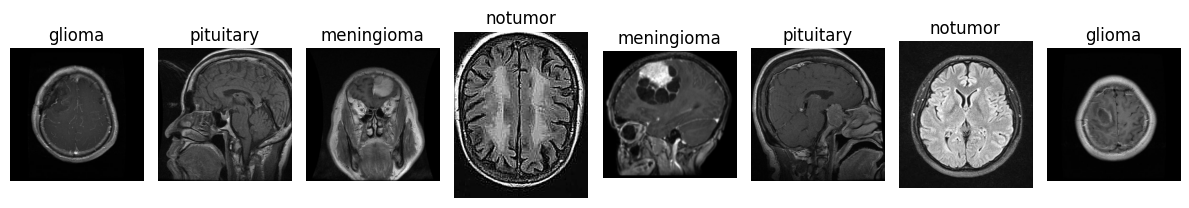

In [ ]:
def display_sample_images(dataframe, n=8):
    plt.figure(figsize=(12, 12))

    sample_df = dataframe.sample(n=n).reset_index(drop=True)

    for i in range(n):
        filepath = sample_df.loc[i, 'filepaths']
        label = sample_df.loc[i, 'labels']

        image = cv2.imread(filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

        plt.subplot(1, n, i+1)
        plt.imshow(image)
        plt.title(label, fontsize=12)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

display_sample_images(train_df, n=8)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import cv2
from tensorflow.keras.optimizers import Adamax
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download the dataset (if not already downloaded)
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

# Define paths to training and testing data
train_df_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training"
test_df_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing"

# Load training data
filepaths = []
labels = []
folds = os.listdir(train_df_path)
for fold in folds:
    foldpath = os.path.join(train_df_path, fold)
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        filepaths.append(fpath)
        labels.append(fold)
train_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})

# Load testing data
filepaths = []
labels = []
folds = os.listdir(test_df_path)
for fold in folds:
    foldpath = os.path.join(test_df_path, fold)
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        filepaths.append(fpath)
        labels.append(fold)
test_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})

# Split testing data into validation and test sets
valid_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Create data generators
gen = ImageDataGenerator()
batch_size = 8
train_gen = gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

test_gen = gen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

valid_gen = gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

# Define the model
model = models.Sequential([
    layers.Conv2D(1024, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_gen, validation_data=valid_gen, epochs=25)



100%|██████████| 149M/149M [00:00<00:00, 222MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1
Found 5712 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 833ms/step - accuracy: 0.6104 - loss: 9.2332 - val_accuracy: 0.8122 - val_loss: 0.4869
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 103s 559ms/step - accuracy: 0.8833 - loss: 0.3214 - val_accuracy: 0.8565 - val_loss: 0.3319
Epoch 3/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 561ms/step - accuracy: 0.9408 - loss: 0.1745 - val_accuracy: 0.9160 - val_loss: 0.2191
Epoch 4/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 564ms/step - accuracy: 0.9633 - loss: 0.1074 - val_accuracy: 0.9221 - val_loss: 0.1965
Epoch 5/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 565ms/step - accuracy: 0.9758 - loss: 0.0691 - val_accuracy: 0.9389 - val_loss: 0.1460
Epoch 6/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 564ms/step - accuracy: 0.9856 - loss: 0.0492 - val_accuracy: 0.9527 - val_loss: 0.1351
Epoch 7/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 563ms/step - accuracy: 0.9877 - loss: 0.0379 - val_accuracy: 0.9405 - val_loss: 0.1584
Epoch 8/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 561ms/step - accuracy: 0.9904 -

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import cv2
from tensorflow.keras.optimizers import Adamax
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download the dataset (if not already downloaded)
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

# Define paths to training and testing data
train_df_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training"
test_df_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing"

# Load training data
filepaths = []
labels = []
folds = os.listdir(train_df_path)
for fold in folds:
    foldpath = os.path.join(train_df_path, fold)
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        filepaths.append(fpath)
        labels.append(fold)
train_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})

# Load testing data
filepaths = []
labels = []
folds = os.listdir(test_df_path)
for fold in folds:
    foldpath = os.path.join(test_df_path, fold)
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        filepaths.append(fpath)
        labels.append(fold)
test_df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})

# Split testing data into validation and test sets
valid_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Create data generators
gen = ImageDataGenerator()
batch_size = 8  # This variable is not used, consider removing it
train_gen = gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

test_gen = gen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

valid_gen = gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

# Define the model
model = models.Sequential([
    layers.Conv2D(1024, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_gen, validation_data=valid_gen, epochs=25)

# Evaluate the model
train_score = model.evaluate(train_gen)
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])

100%|██████████| 149M/149M [00:00<00:00, 156MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1
Found 5712 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 194s 813ms/step - accuracy: 0.5855 - loss: 10.1364 - val_accuracy: 0.8168 - val_loss: 0.5189
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 539ms/step - accuracy: 0.8851 - loss: 0.3288 - val_accuracy: 0.8809 - val_loss: 0.3315
Epoch 3/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 545ms/step - accuracy: 0.9296 - loss: 0.1938 - val_accuracy: 0.9069 - val_loss: 0.2721
Epoch 4/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 546ms/step - accuracy: 0.9596 - loss: 0.1199 - val_accuracy: 0.9252 - val_loss: 0.2071
Epoch 5/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 544ms/step - accuracy: 0.9652 - loss: 0.0995 - val_accuracy: 0.9221 - val_loss: 0.2375
Epoch 6/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 543ms/step - accuracy: 0.9807 - loss: 0.0615 - val_accuracy: 0.9191 - val_loss: 0.3100
Epoch 7/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 543ms/step - accuracy: 0.9829 - loss: 0.0510 - val_accuracy: 0.9466 - val_loss: 0.1668
Epoch 8/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 543ms/step - accuracy: 0.9913 - loss

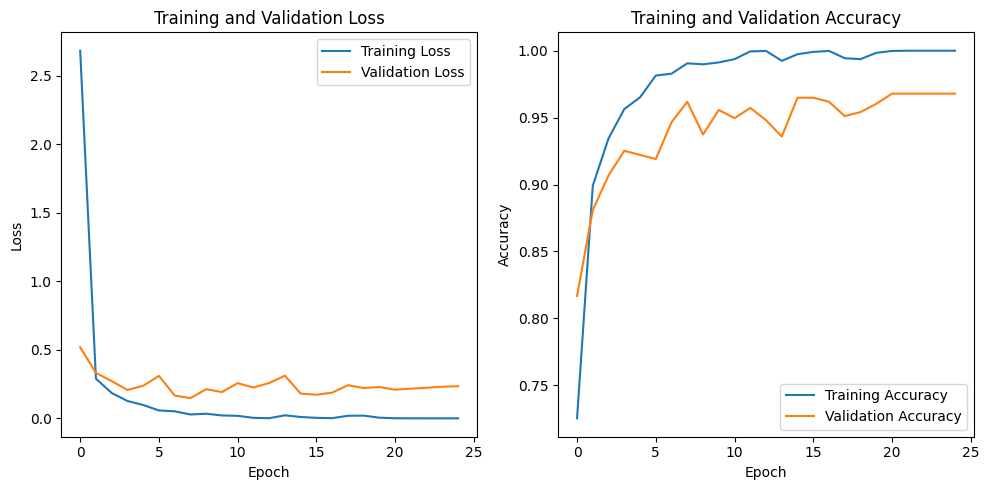

In [ ]:
plt.figure(figsize=(10, 5))

# Loss Subplot
plt.subplot(1, 2, 1)  # Create first subplot occupying half the figure width
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy Subplot
plt.subplot(1, 2, 2)  # Create second subplot occupying the remaining half
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()



In [ ]:
from google.colab import files
model.save('model.h5')

In [ ]:
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>